In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def load_network():
    network = cv.dnn.readNetFromDarknet(r'yolo.cnf', r'yolo.weights')
    return network


def load_image(path):
    image = cv.imread(path)
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.show()
    return image


def preprocess_image(image):
    blob = cv.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    height, width = image.shape[:2]
    return blob, height, width


def detect_objects(network, blob, height, width):
    network.setInput(blob)
    output_layers_name=network.getUnconnectedOutLayersNames()
    layeroutput=network.forward(output_layers_name)
    boxes=[]
    confidences=[]
    class_ids=[]

    for output in layeroutput:
        for detection in output:
            score=detection[5:]
            class_id=np.argmax(score)
            confidence=score[class_id]
            if confidence>0.5:
                center_x=int(detection[0]*width)
                center_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)

                x=int(center_x-w/2)
                y=int(center_y-h/2)

                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes=cv.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    return boxes, class_ids, confidences, indexes


def visualize_objects(image, boxes, class_ids, confidences, indexes):
    font=cv.FONT_HERSHEY_PLAIN
    colors=np.random.uniform(0,255,size=(len(boxes),3))

    with open(r'coco.names','r') as f:
        classes=f.read().splitlines()

    for i in indexes.flatten():
        x,y,w,h=boxes[i]

        label=str(classes[class_ids[i]])
        confi=str(round(confidences[i],2))
        color=colors[i]

        cv.rectangle(image,(x,y),(x+w,y+h),color,5)
        cv.putText(image,label+" "+confi,(x,y+20),font,2,(255,255,255),1)

    plt.imshow(image)

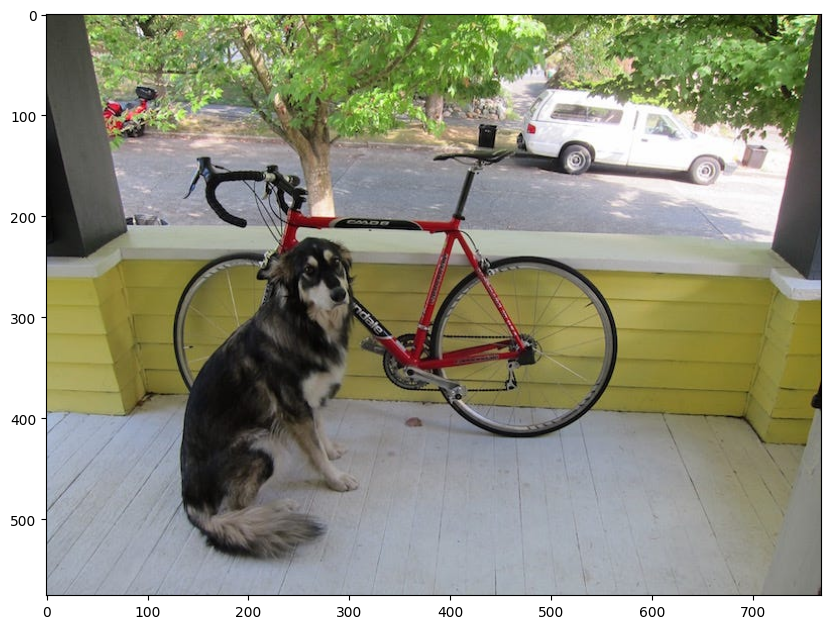

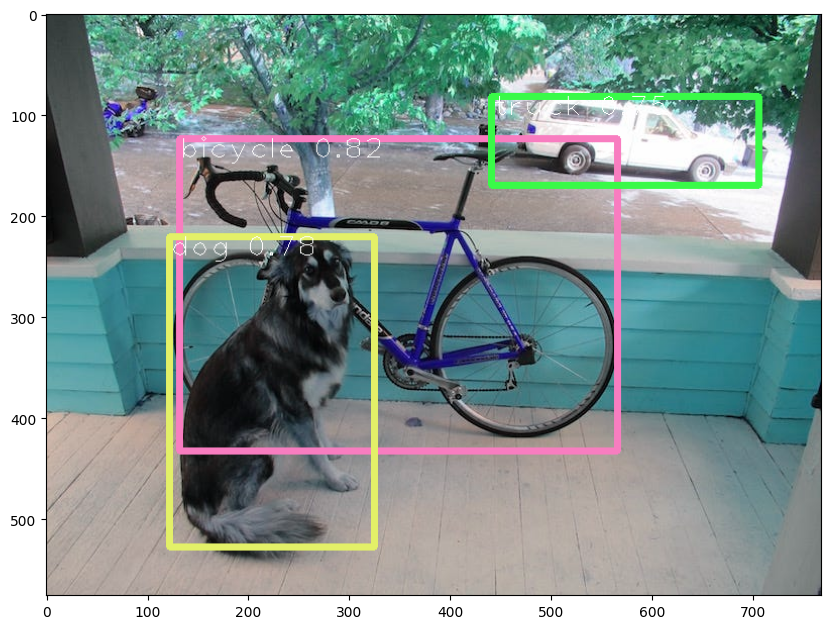

In [32]:
def main():
    network = load_network()
    image = load_image(r'image4.jpg')
    blob, height, width = preprocess_image(image)
    boxes, class_ids, confidences, indexes = detect_objects(network, blob, height, width)
    visualize_objects(image, boxes, class_ids, confidences, indexes)


if __name__ == '__main__':
    main()

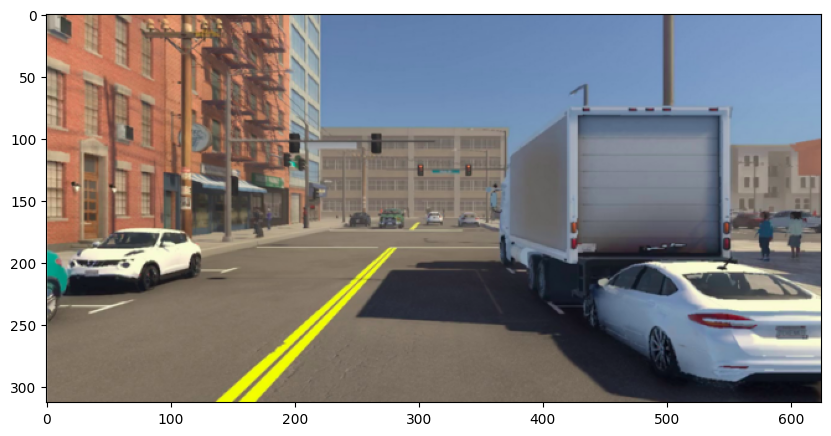

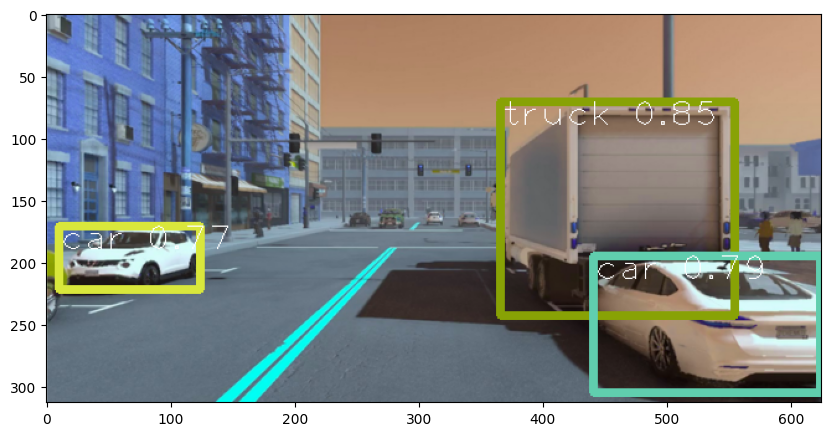

In [33]:
def main():
    network = load_network()
    image = load_image(r'image5.png')
    blob, height, width = preprocess_image(image)
    boxes, class_ids, confidences, indexes = detect_objects(network, blob, height, width)
    visualize_objects(image, boxes, class_ids, confidences, indexes)


if __name__ == '__main__':
    main()

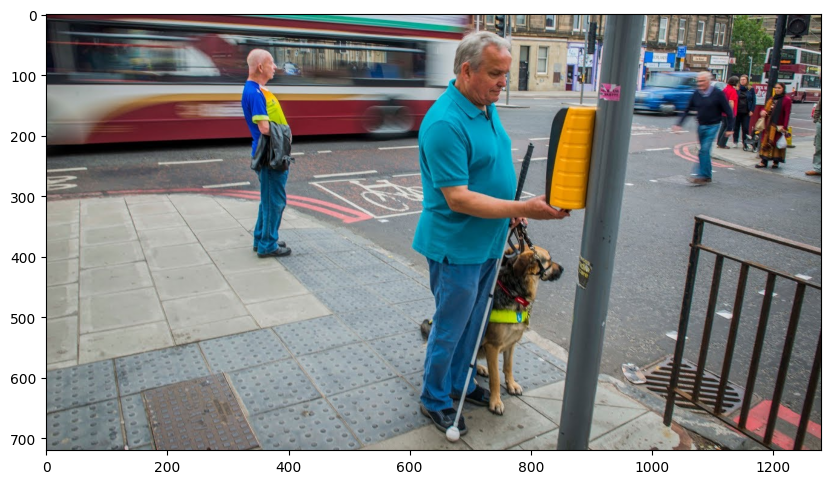

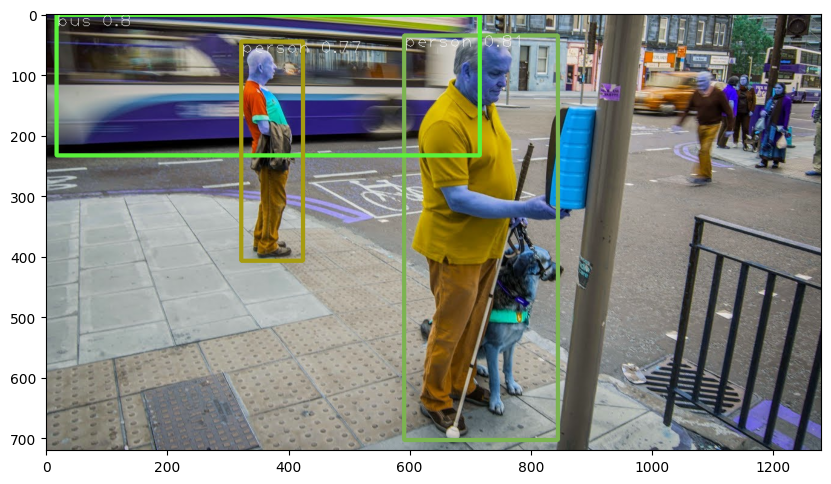

In [34]:
def main():
    network = load_network()
    image = load_image(r'image6.jpg')
    blob, height, width = preprocess_image(image)
    boxes, class_ids, confidences, indexes = detect_objects(network, blob, height, width)
    visualize_objects(image, boxes, class_ids, confidences, indexes)


if __name__ == '__main__':
    main()

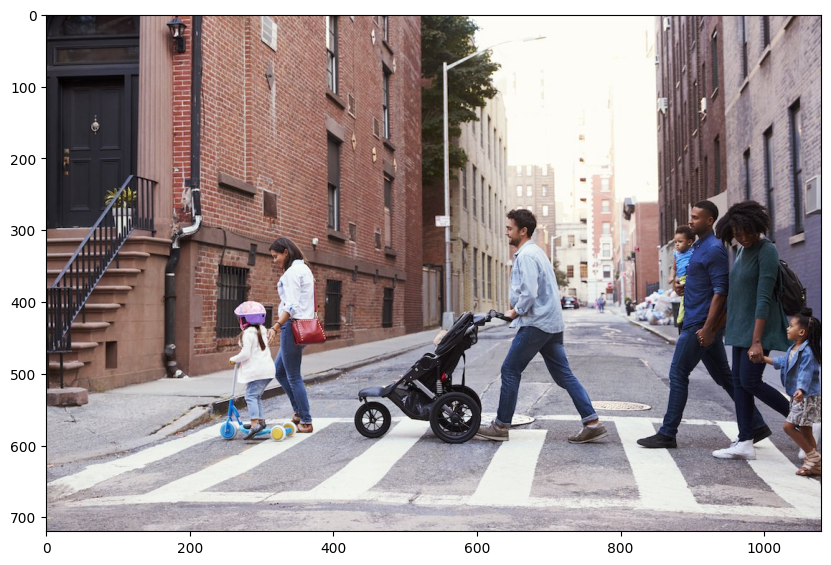

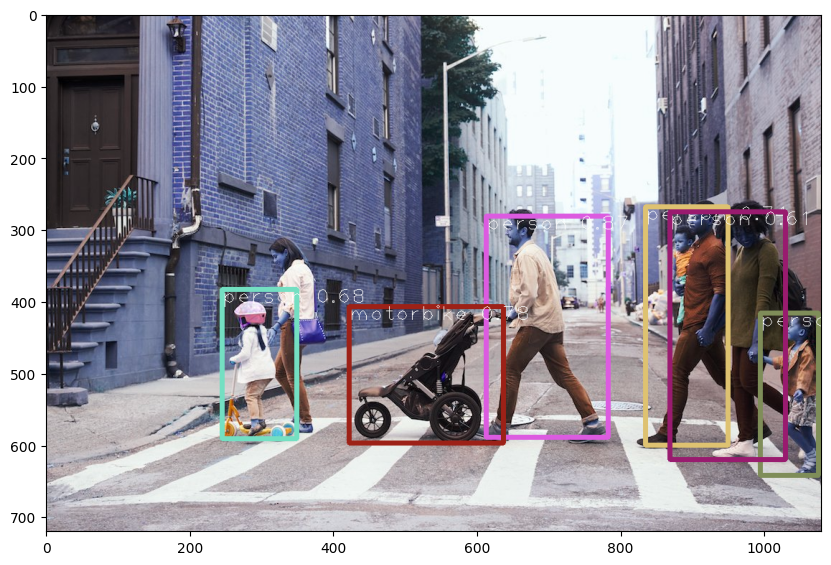

In [36]:
def main():
    network = load_network()
    image = load_image(r'image7.jpg')
    blob, height, width = preprocess_image(image)
    boxes, class_ids, confidences, indexes = detect_objects(network, blob, height, width)
    visualize_objects(image, boxes, class_ids, confidences, indexes)


if __name__ == '__main__':
    main()